## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

#### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer


#### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Problem Statement

The problem statement is to find the customer segment/group that is the most likely to purchase the newly introduced travel package. We can see that the marketing cost was high (as customers were contacted at random without looking at the available information), hence the number of false positives must be minimized (customers that we thought will buy the package, but they end up not buying it, even after we spend marketing cost for them) which leads to an optimization of precision. We will build several models using ensemble techniques and use the best model for customer prediction.

## Data Importing & Checking

In [1]:
#installation for xgboost
#!pip install xgboost

In [2]:
#importing of required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
#importing data

df = pd.read_excel('Tourism.xlsx','Tourism')

In [4]:
df.shape

(4888, 20)

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.describe(include ='object')

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


From the describe function, we can observe some interesting features:
1. The product taken is around 18% of the customers, which matches what was mentioned on the problem statement.
2. Based on age data, number of person visiting and number of children visiting data, most of the customers have a family with 1 child on average.
3. More customers do not have a passport - many don't have international exposure
4. More customers like to visit more developed places
5. There is a certain outlier where the marketer talk for 127 mins, where the mean is 15 mins
6. More customers do a self-enquiry on the product

The findings of the other data will be shown on the Exploratory Data Analysis section for ease of explanation with the help of visualizations.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

It seems that there are missing data for some of the columns (Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome). We will deal with the missing data using the methods on the next section after changing the 'object' data type into 'category'.

## Exploratory Data Analysis & Data Preparation

#### Conversion of Data Type

In [9]:
#converting data type
df['TypeofContact'] = df['TypeofContact'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Designation'] = df['Designation'].astype('category')

#checking of conversion results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

#### Dropping Unusable Columns

In this case, we won't find insights from CustomerID, hence we will remove it.

In [10]:
df.drop('CustomerID',axis = 1,inplace=True)

In [11]:
#checking if data has been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

A decision must be made whether to drop or to impute the missing data. We will first check on the distribution of the data to support the next decision for handling missing data.

#### Exploratory Data Analysis - Univariate Analysis

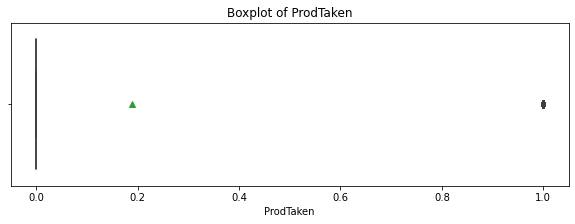

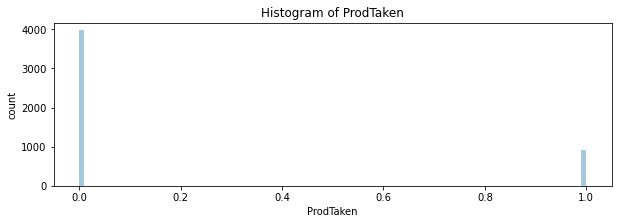

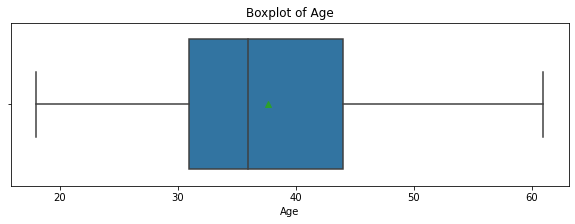

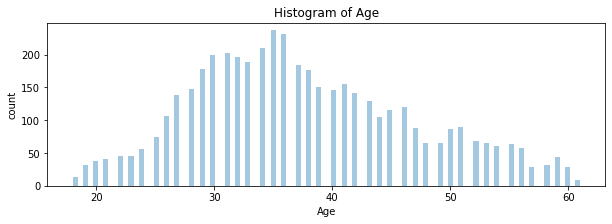

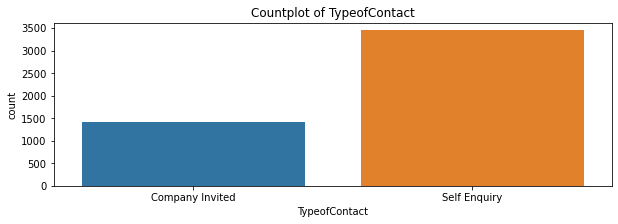

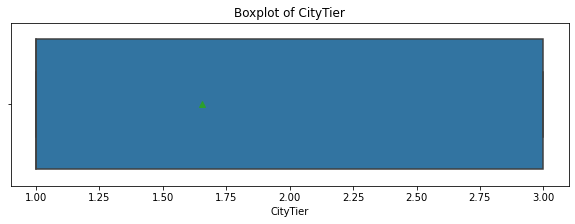

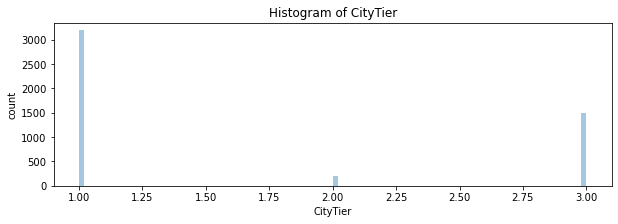

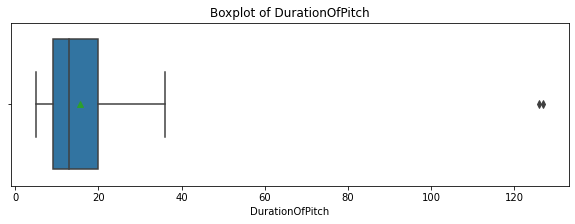

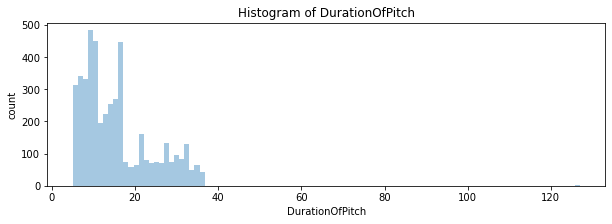

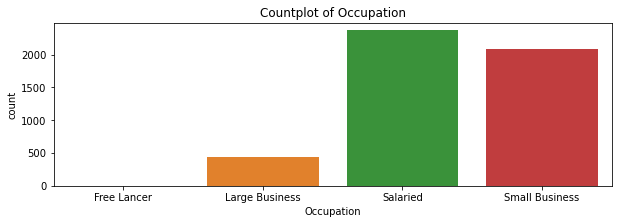

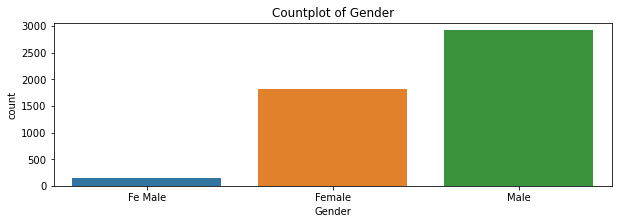

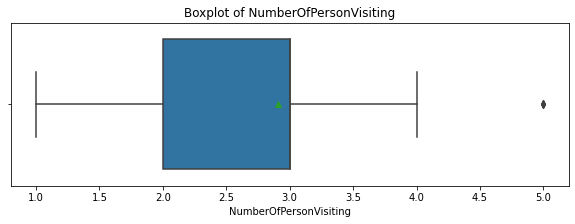

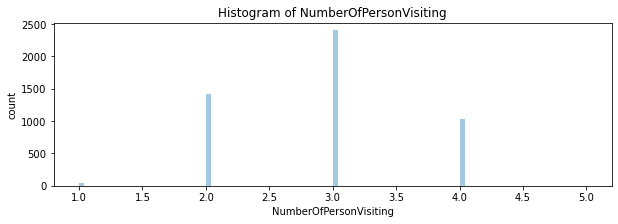

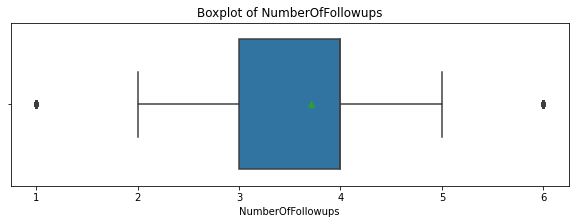

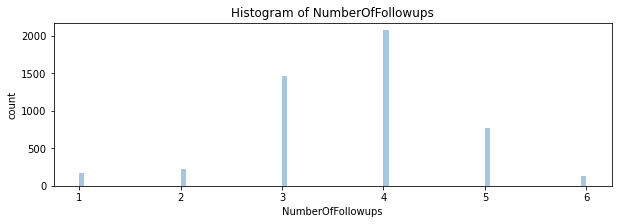

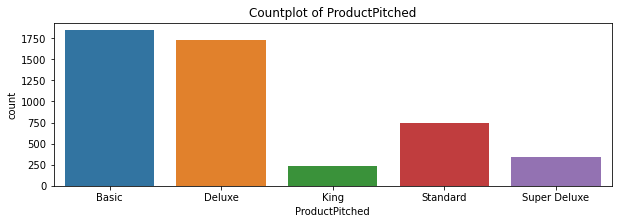

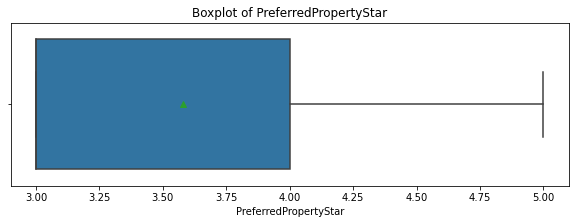

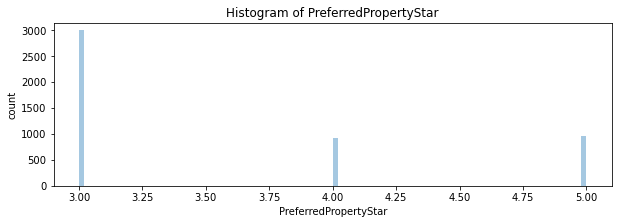

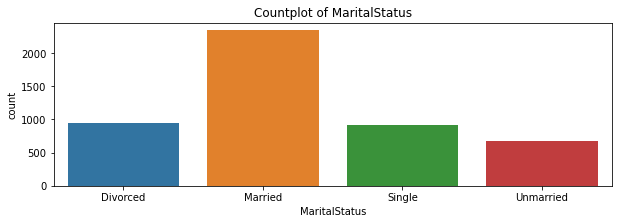

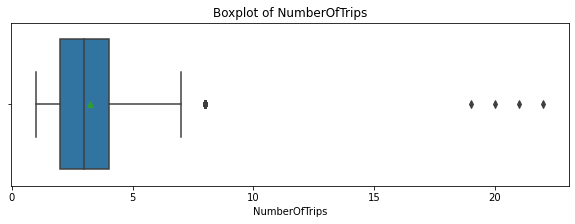

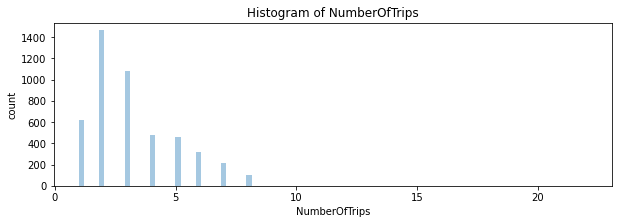

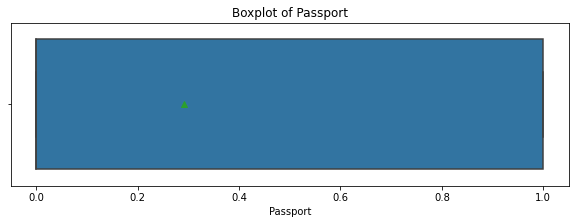

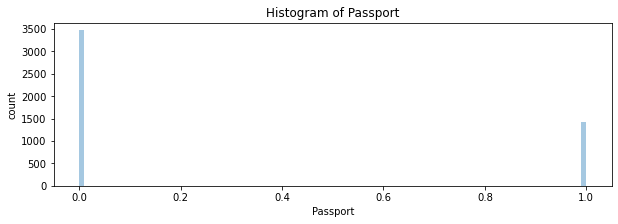

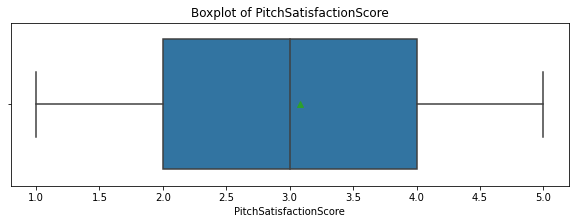

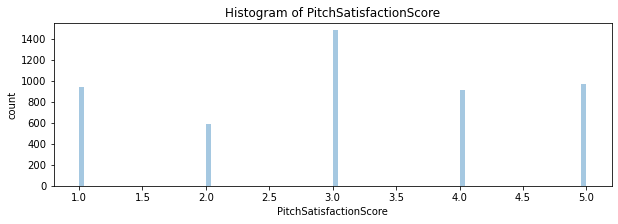

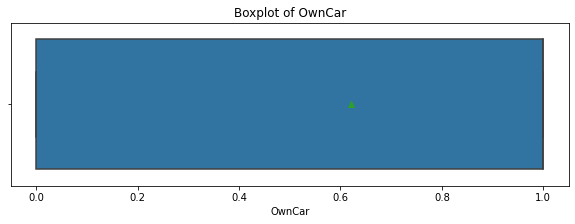

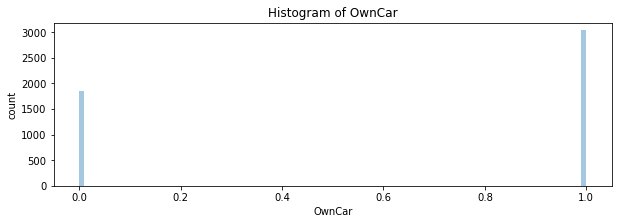

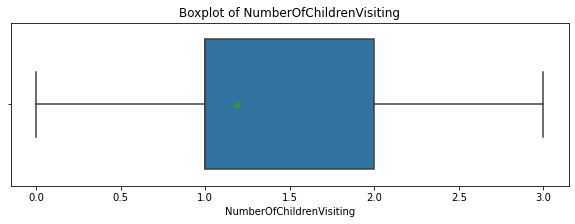

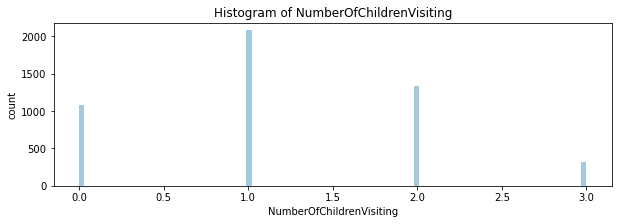

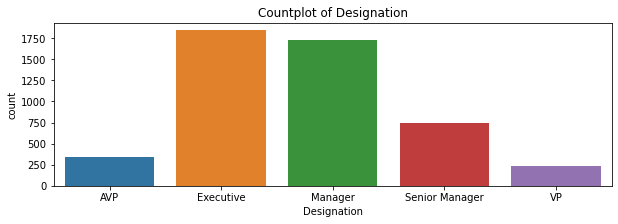

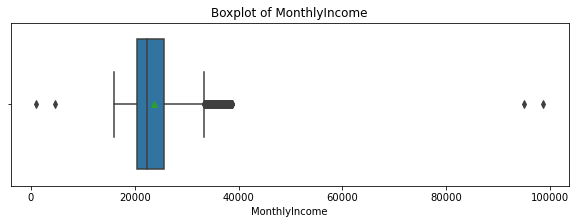

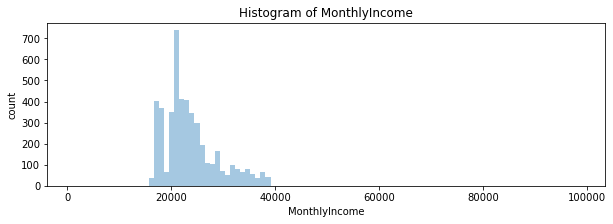

In [12]:
for i in df.columns:
    if type(df[i][0])!=str:        
        plt.figure(figsize=(10, 3))
        sns.boxplot(df[i], showmeans=True)
        plt.title('Boxplot of {}'.format(i))
        plt.show()
        plt.figure(figsize=(10, 3))
        sns.distplot(df[i], kde = False, bins = 100)
        plt.title('Histogram of {}'.format(i))
        plt.ylabel('count')
        plt.show()
    elif type(df[i][0])==str:
        plt.figure(figsize=(10, 3))
        sns.countplot(df[i])
        plt.title('Countplot of {}'.format(i))
        plt.show()
        

From univariate analysis above, we can find out that:
1. There are significantly more customers who did not take the product.
2. Age is somewhat normally distributed.
3. There are more customers that made a self enquiry on the product as compared to those who are company invited.
4. There are more customers that has city tier of 1.
5. The duration of pitch is generally between 10-15 minutes, but **there are outliers that need to be removed.** Duration of pitch is right skewed, and hence a **logarithmic scaling can be done to represent the data. The updated data will be shown below.**
6. The occupation status of the customers is mostly salaried, followed by small business. Very few of the customers are freelancers.
7. **There is a typo on some of the data input for the gender female, written as 'Fe Male'. Adjustments need to be made later.** From the chart, more of the customers are male.
8. The number of persons planning to take the trip with the customer is around 2-4. **Outliers need to be treated.**
9. The number of followups is around 3-4 generally. **Outliers need to be treated.**
10. Most of the product pitched are basic and deluxe.
11. More of the customers have a preferred property star of 3.
12. More of the customers are married.
13. The number of trips are around 3. **Outliers need to be treated.**
14. More of the customers do not have a passport.
15. On average, the pitch satisfaction score is around 3.
16. More customers own a car.
17. Number of children with age less than 5 planning to take the trip with the customer is generally around 1-2.
18. More of the customers' designation is executive or manager.
19. Monthly income is right skewed. **Logarithmic scaling can be done to represent the data. The updated data will be shown below. In addition, outliers need to be treated.**

#### Data Pre-Processing

In [13]:
#Converting 'Fe Male' into 'Female'

def genderconv(gender):
    if gender == 'Fe Male':
        gender = 'Female'
    return gender

df['Gender'] = df['Gender'].apply(genderconv)
df['Gender'] = df['Gender'].astype('category')

df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<AxesSubplot:xlabel='DurationOfPitch'>

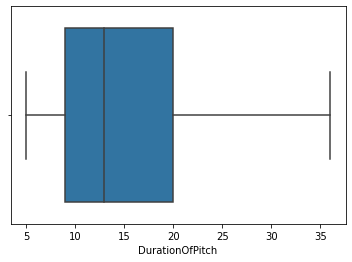

In [14]:
#OUTLIER REMOVAL

#Outlier Removal for DurationOfPitch
#From the observation above, the outliers are those data points above 120

df.drop(df.loc[df['DurationOfPitch'] > 120].index, axis=0, inplace=True)

#check if data has been get rid of
sns.boxplot(df['DurationOfPitch'])

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

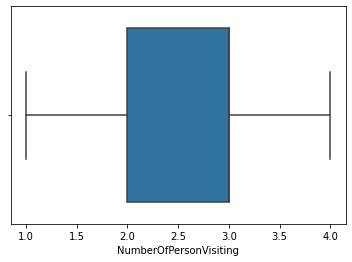

In [15]:
#Outlier Removal for NumberOfPersonVisiting
#From the observation above, outliers are data points above 4

df.drop(df.loc[df['NumberOfPersonVisiting'] > 4].index, axis=0, inplace=True)

#check if data has been get rid of
sns.boxplot(df['NumberOfPersonVisiting'])

<AxesSubplot:xlabel='NumberOfFollowups'>

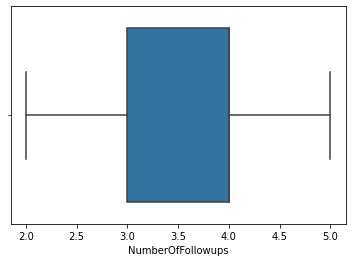

In [16]:
#Outlier Removal for NumberOfFollowups
#From the observation above, outliers are data points outside the range of 2-5

df.drop(df.loc[df['NumberOfFollowups'] > 5].index, axis=0, inplace=True)
df.drop(df.loc[df['NumberOfFollowups'] < 2].index, axis=0, inplace=True)

#check if data has been get rid of
sns.boxplot(df['NumberOfFollowups'])

<AxesSubplot:xlabel='NumberOfTrips'>

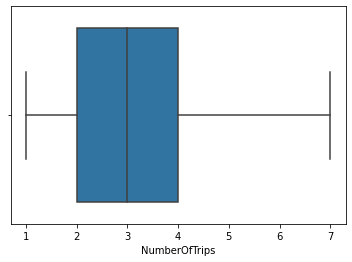

In [17]:
#Outlier Removal for NumberOfTrips
#From the observation above, outliers are data points above 7.5

df.drop(df.loc[df['NumberOfTrips'] > 7.5].index, axis=0, inplace=True)

#check if data has been get rid of
sns.boxplot(df['NumberOfTrips'])

<AxesSubplot:xlabel='MonthlyIncome'>

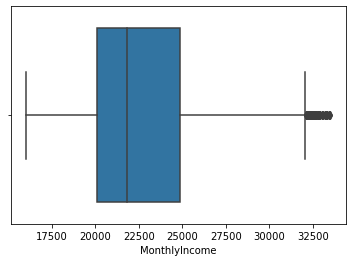

In [18]:
#Outlier Removal for MonthlyIncome
#From the observation above, outliers are data points above 7.5

IQRmonthlyincome = df['MonthlyIncome'].quantile(0.75) + 1.5 * (df['MonthlyIncome'].quantile(0.75) - df['MonthlyIncome'].quantile(0.25))

df.drop(df.loc[df['MonthlyIncome'] < 10000].index, axis=0, inplace=True)
df.drop(df.loc[df['MonthlyIncome'] > IQRmonthlyincome].index, axis=0, inplace=True)

#check if data has been get rid of
sns.boxplot(df['MonthlyIncome'])

#the distribution seems to change, but ultimately the outliers have been removed.

In [19]:
#checking on remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4150 non-null   int64   
 1   Age                       3941 non-null   float64 
 2   TypeofContact             4129 non-null   category
 3   CityTier                  4150 non-null   int64   
 4   DurationOfPitch           3916 non-null   float64 
 5   Occupation                4150 non-null   category
 6   Gender                    4150 non-null   category
 7   NumberOfPersonVisiting    4150 non-null   int64   
 8   NumberOfFollowups         4105 non-null   float64 
 9   ProductPitched            4150 non-null   category
 10  PreferredPropertyStar     4150 non-null   float64 
 11  MaritalStatus             4150 non-null   category
 12  NumberOfTrips             4150 non-null   float64 
 13  Passport                  4150 non-null   int64 

In [20]:
df.shape

(4150, 19)

After removal of outliers, we can see that the missing data for the columns 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting' has been rid of. Let's impute the values for the rest of the columns with missing data.

In [21]:
#MISSING DATA IMPUTATION

df['Age'].fillna(df['Age'].mean(), inplace=True) #mean is used for continuous numerical data
df['TypeofContact'].fillna('Self Enquiry', inplace=True) #mode is used for categorical data
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace=True) #mean is used for continuous numerical data
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(), inplace=True) #median is used for discrete numerical data
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True) #mean is used for continuous numerical data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4150 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4150 non-null   int64   
 1   Age                       4150 non-null   float64 
 2   TypeofContact             4150 non-null   category
 3   CityTier                  4150 non-null   int64   
 4   DurationOfPitch           4150 non-null   float64 
 5   Occupation                4150 non-null   category
 6   Gender                    4150 non-null   category
 7   NumberOfPersonVisiting    4150 non-null   int64   
 8   NumberOfFollowups         4150 non-null   float64 
 9   ProductPitched            4150 non-null   category
 10  PreferredPropertyStar     4150 non-null   float64 
 11  MaritalStatus             4150 non-null   category
 12  NumberOfTrips             4150 non-null   float64 
 13  Passport                  4150 non-null   int64 

#### Exploratory Data Analysis - Univariate Analysis (After Preprocessing)

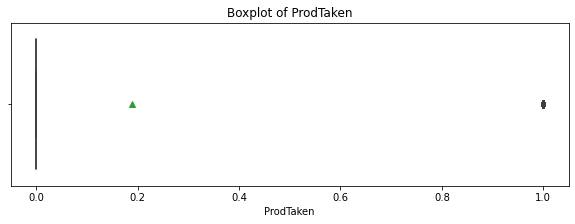

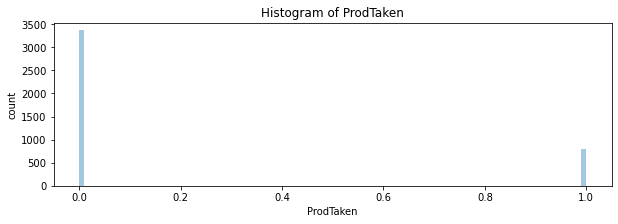

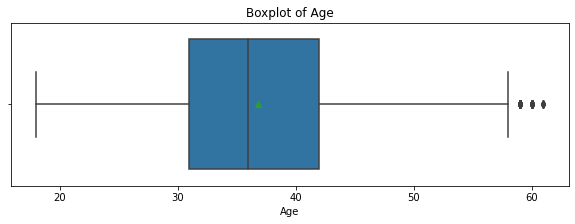

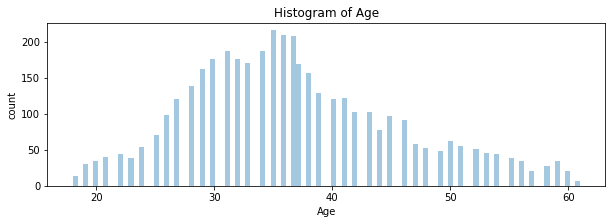

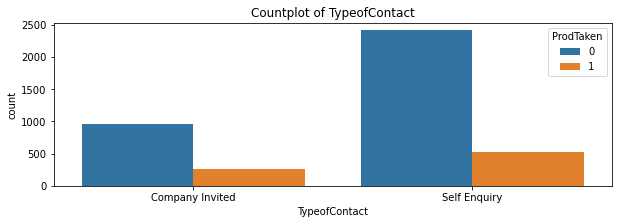

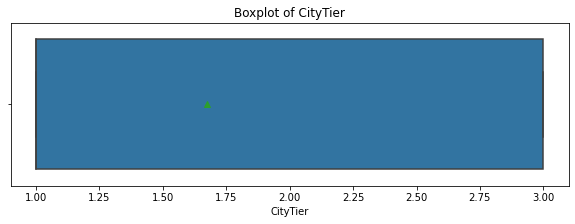

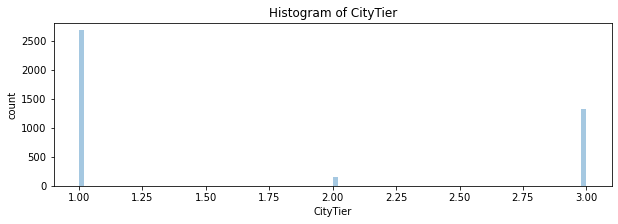

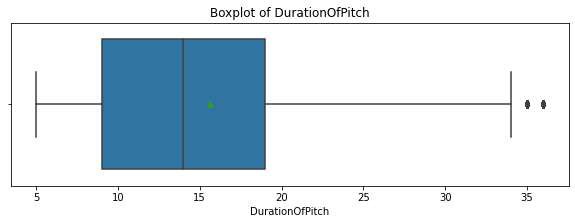

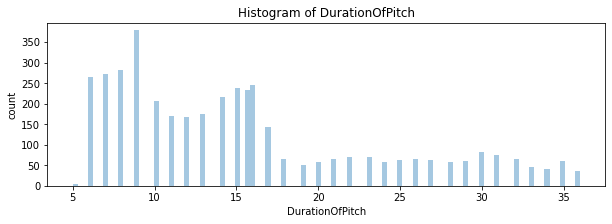

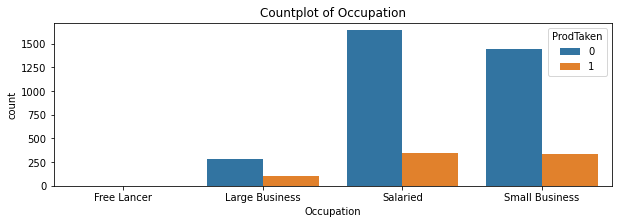

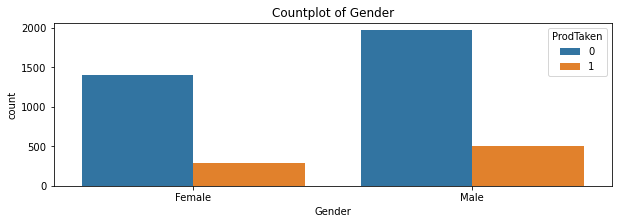

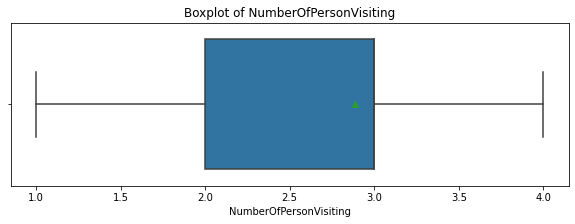

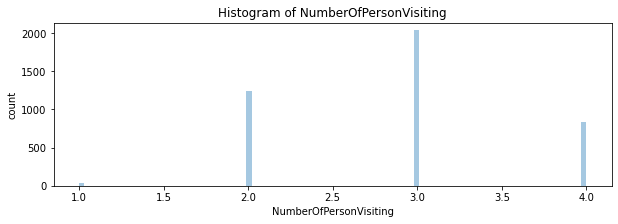

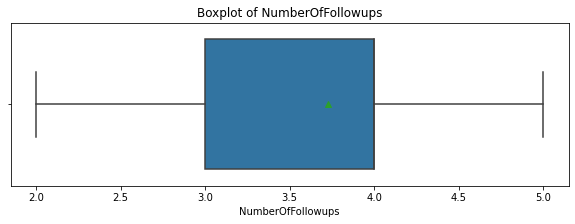

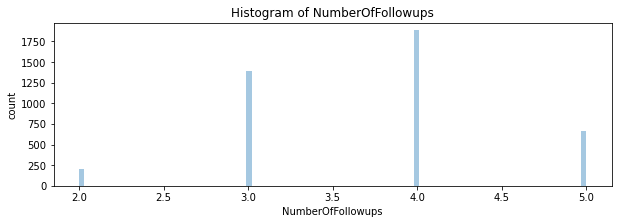

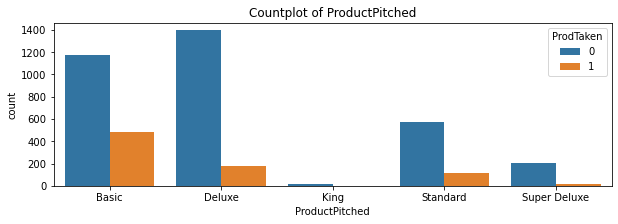

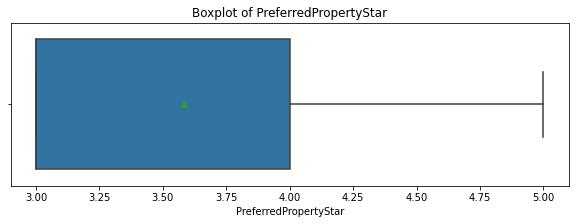

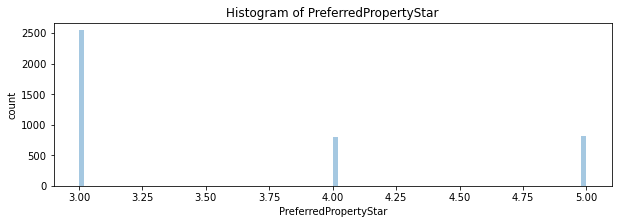

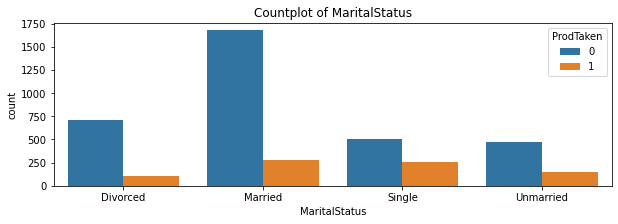

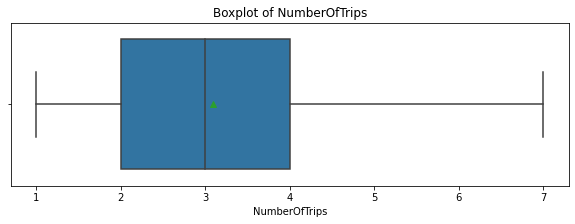

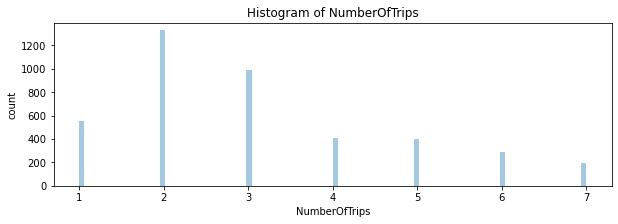

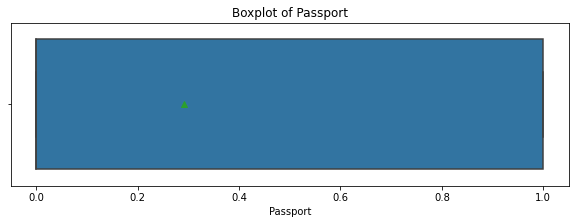

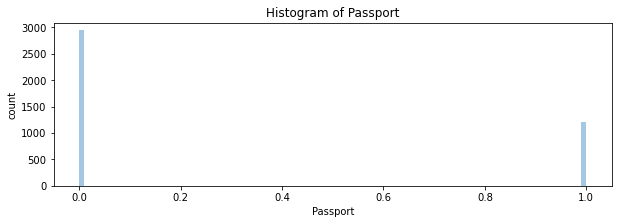

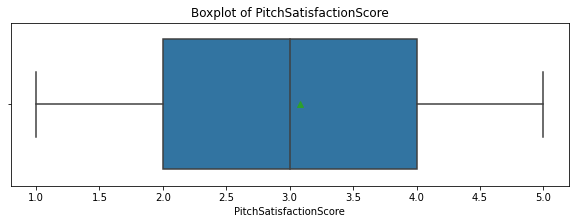

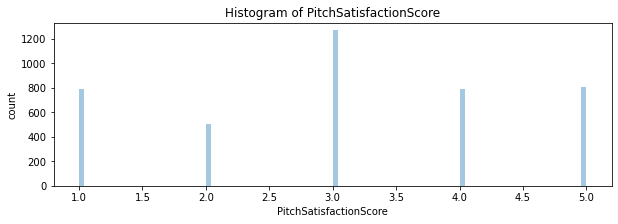

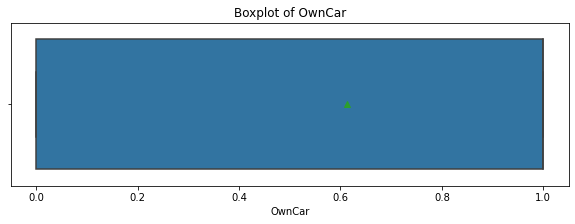

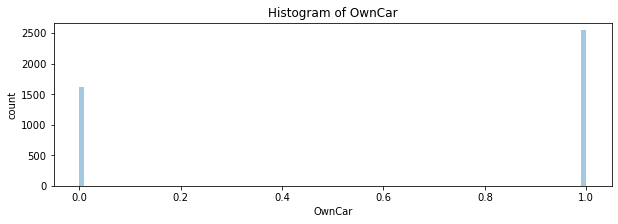

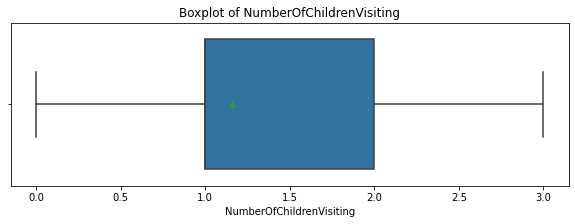

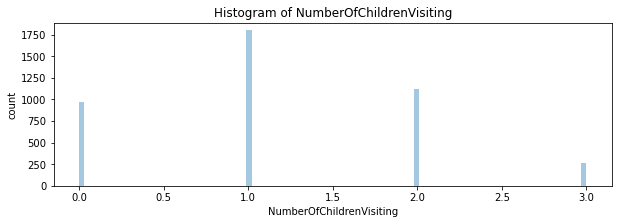

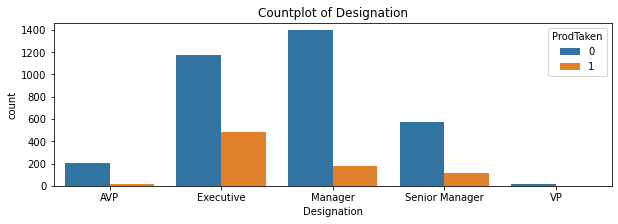

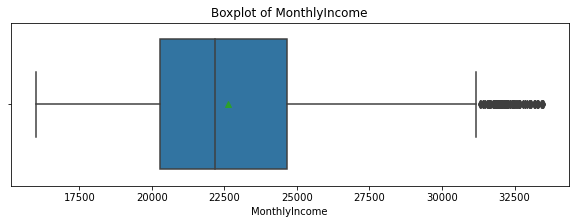

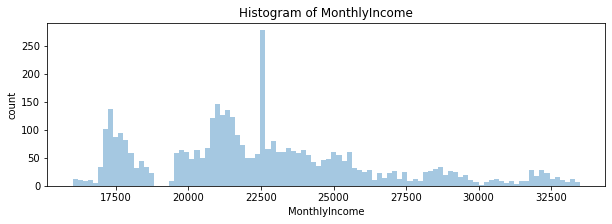

In [23]:
for i in df.columns:
    if type(df[i][0])!=str:        
        plt.figure(figsize=(10, 3))
        sns.boxplot(df[i], showmeans=True)
        plt.title('Boxplot of {}'.format(i))
        plt.show()
        plt.figure(figsize=(10, 3))
        sns.distplot(df[i], kde = False, bins = 100)
        plt.title('Histogram of {}'.format(i))
        plt.ylabel('count')
        plt.show()
    elif type(df[i][0])==str:
        plt.figure(figsize=(10, 3))
        sns.countplot(df[i], hue = df['ProdTaken'])
        plt.title('Countplot of {}'.format(i))
        plt.show()
        

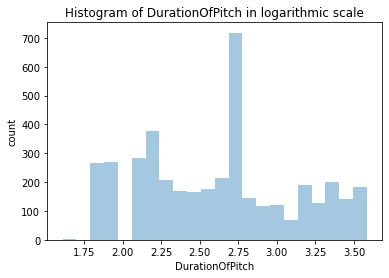

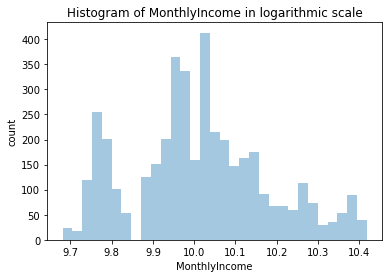

In [24]:
#histogram using logarithmic scale

#Duration of Pitch
sns.distplot(np.log(df['DurationOfPitch']), kde = False)
plt.title('Histogram of DurationOfPitch in logarithmic scale')
plt.ylabel('count')
plt.show()

#Monthly Income
sns.distplot(np.log(df['MonthlyIncome']), kde = False)
plt.title('Histogram of MonthlyIncome in logarithmic scale')
plt.ylabel('count')
plt.show()

#### Exploratory Data Analysis - Bivariate Analysis

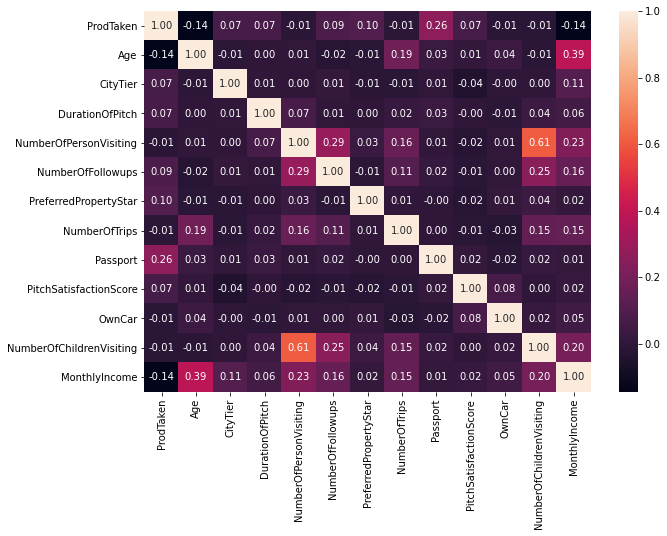

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f',)
plt.show()

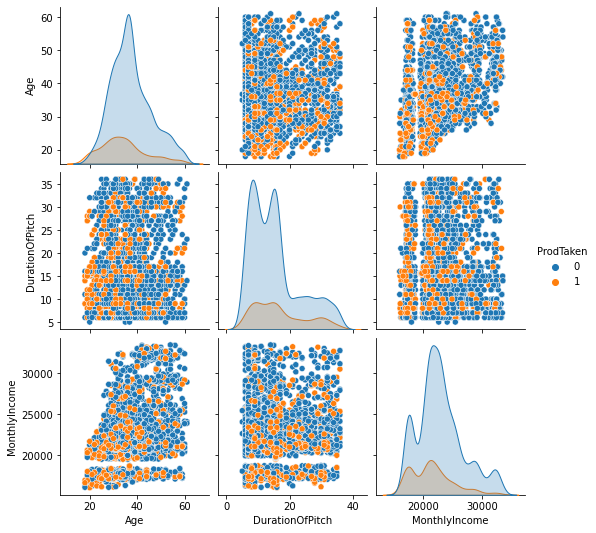

In [26]:
sns.pairplot(df[['Age','DurationOfPitch','MonthlyIncome','ProdTaken']], hue = 'ProdTaken')

There doesn't seem to be any extreme correlation between the numerical columns as per shown in both pairplot and heatmap. We can at least see that : 
1. A notable correlation is between number of person visiting and number of children visiting, as the person visiting could be referring to children visiting.
2. The target variable, 'ProdTaken', seems to be mostly correlated to passport. This could be a hint to what's the most important feature that is related to the target variable.
3. From pairplot, we can see that those who take the product are younger, exposed to a shorter duration of pitch and have less monthly income.

Now let's see the bivariate analysis between the categorical data and the numerical data as per below.

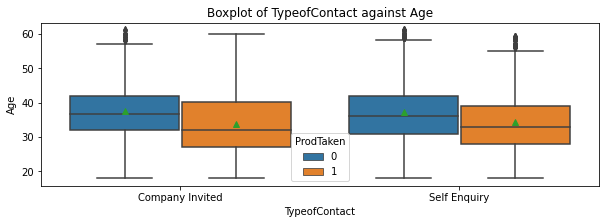

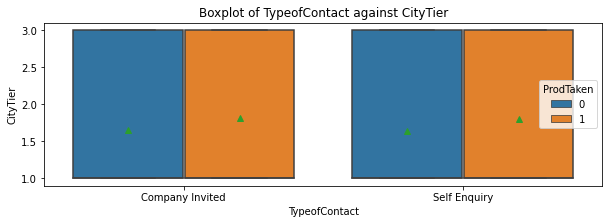

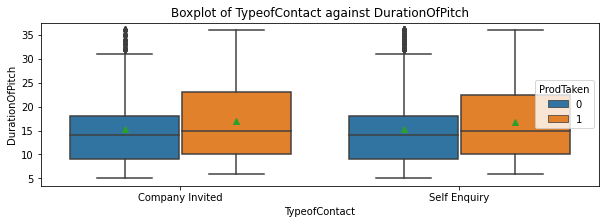

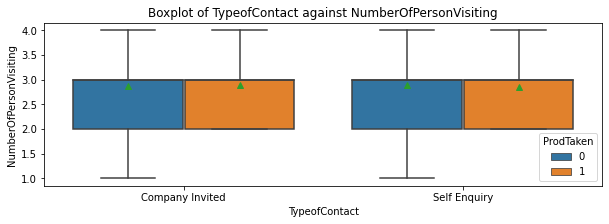

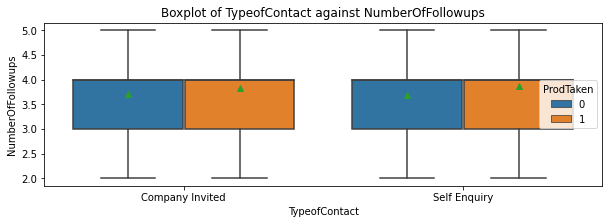

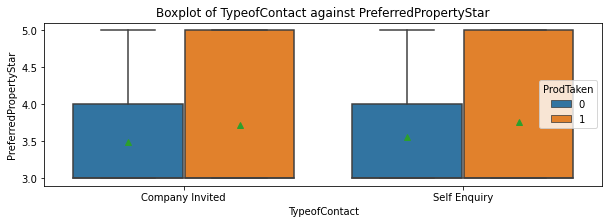

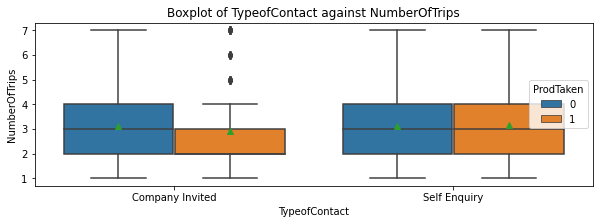

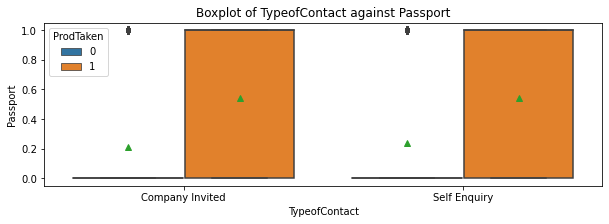

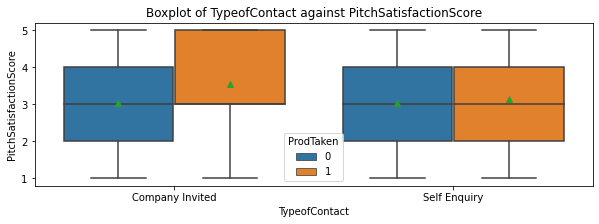

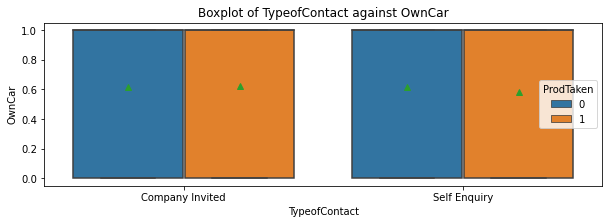

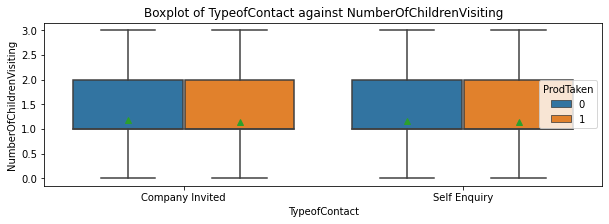

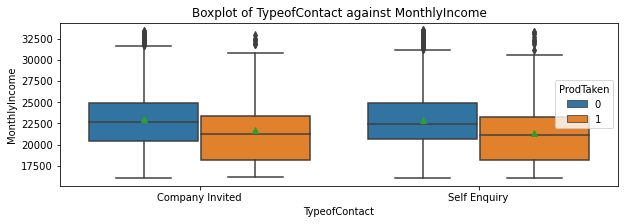

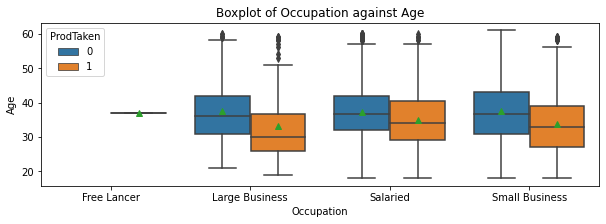

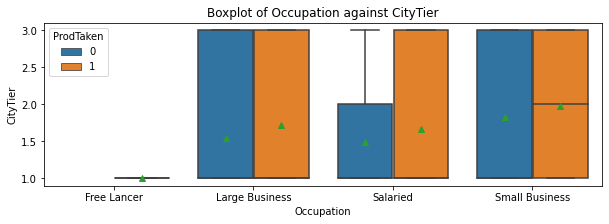

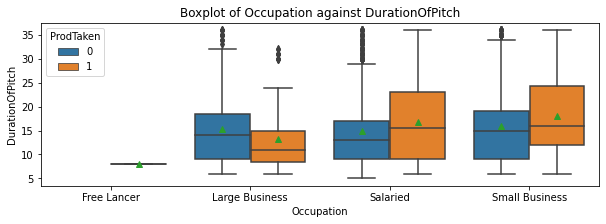

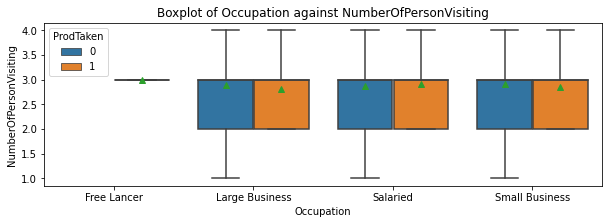

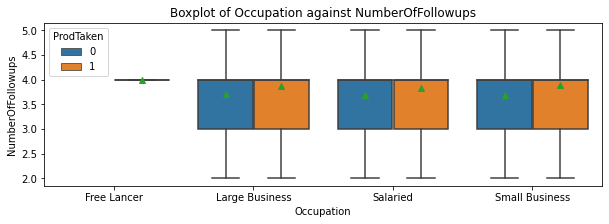

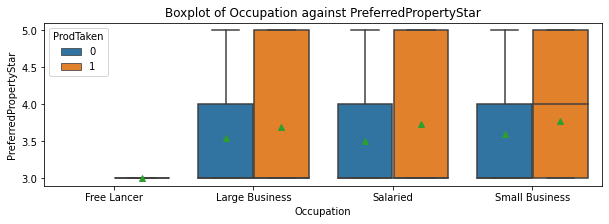

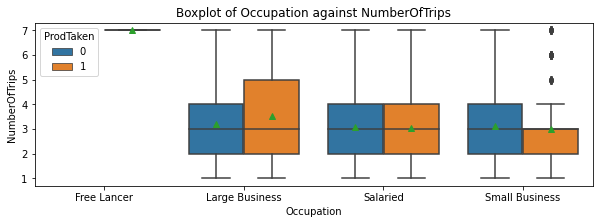

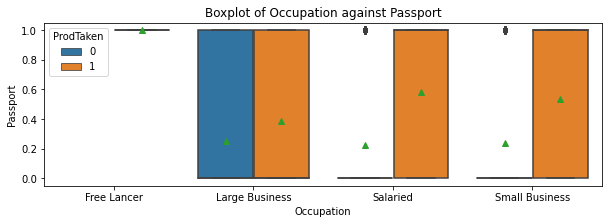

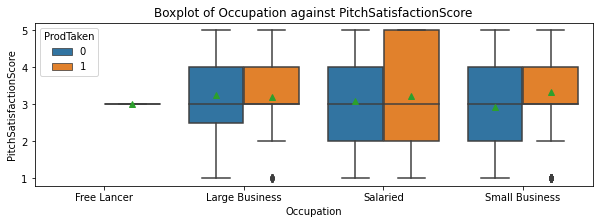

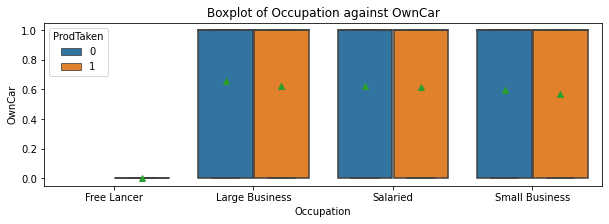

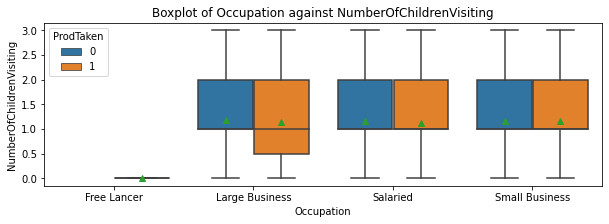

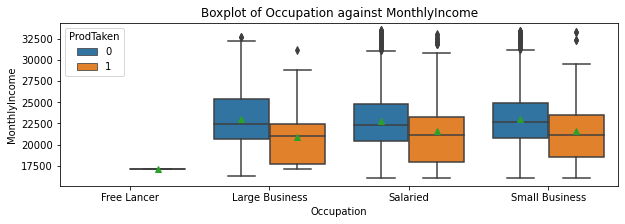

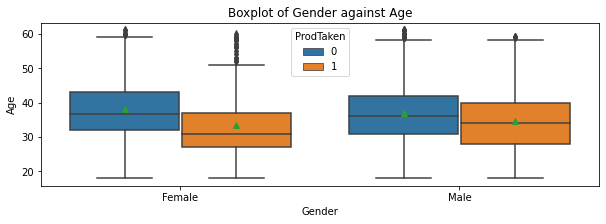

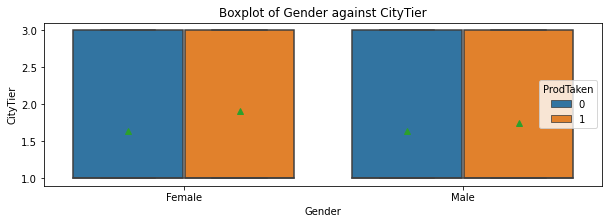

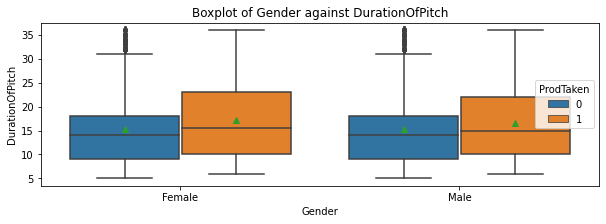

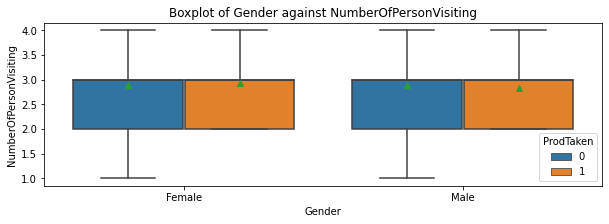

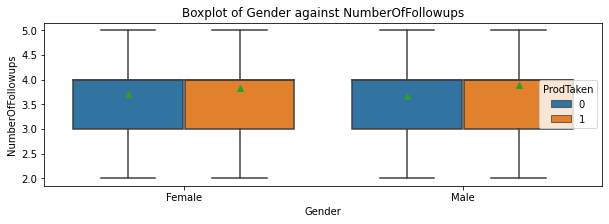

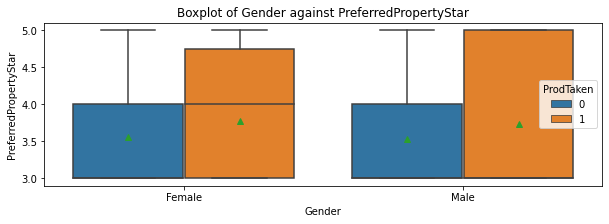

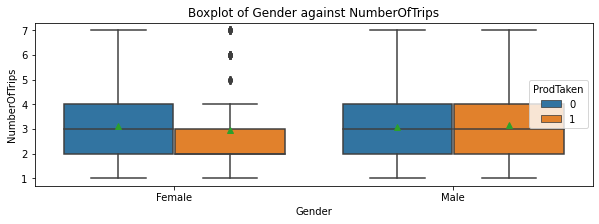

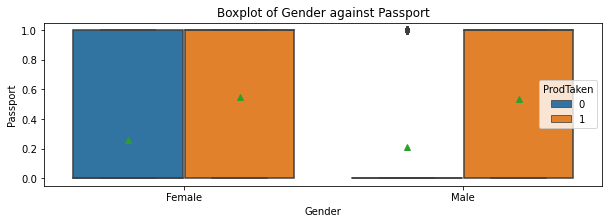

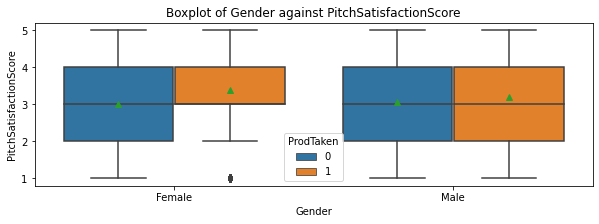

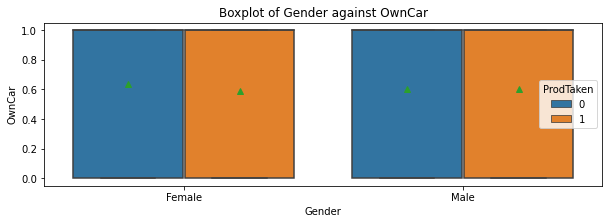

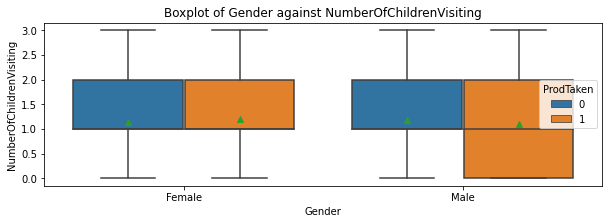

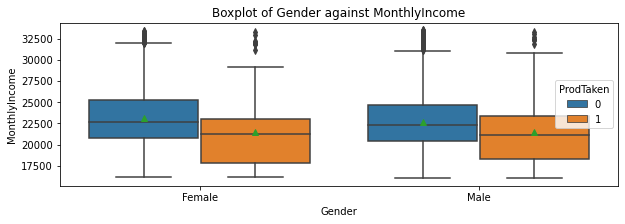

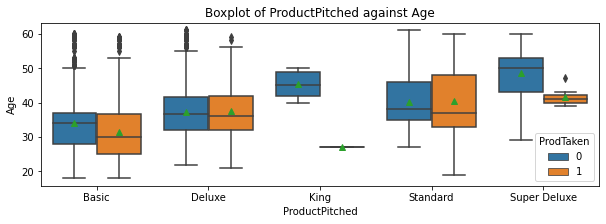

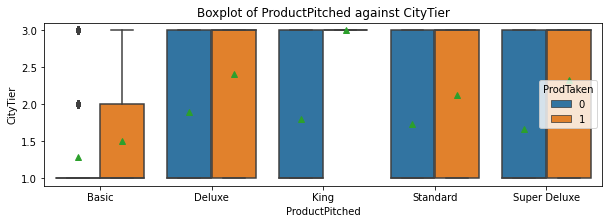

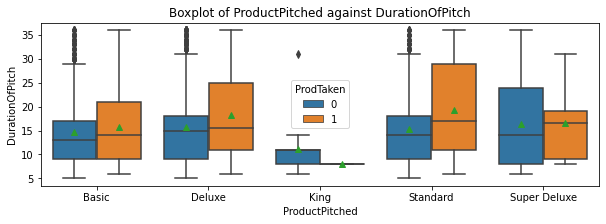

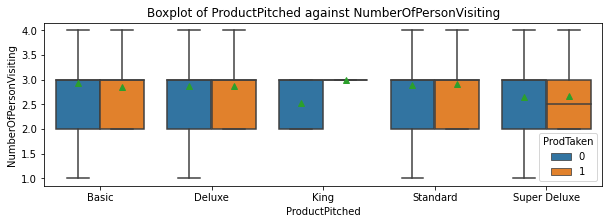

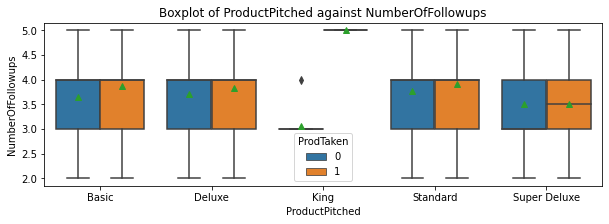

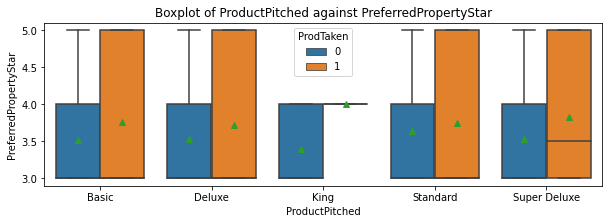

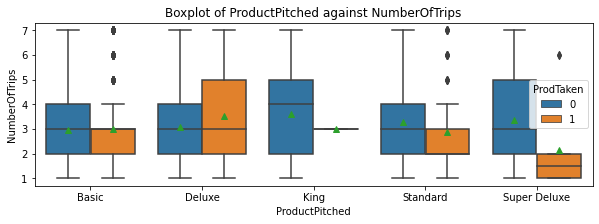

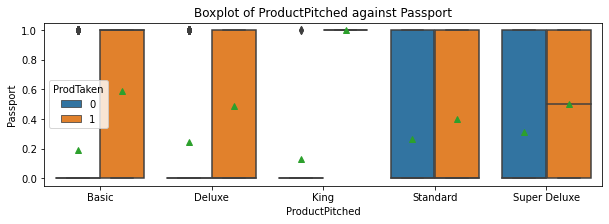

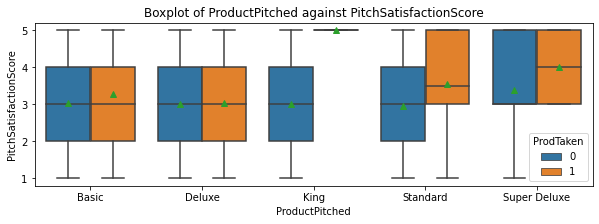

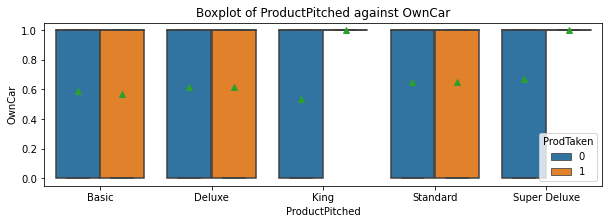

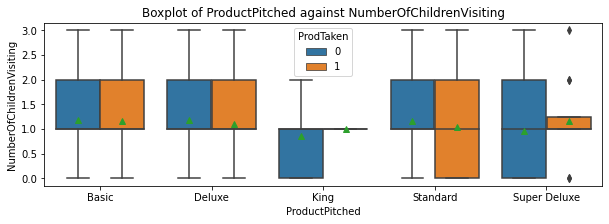

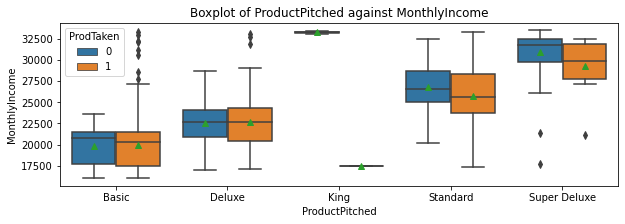

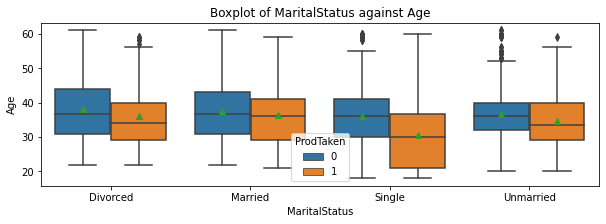

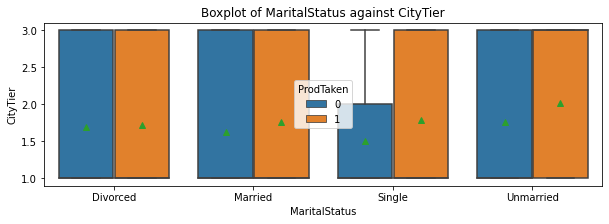

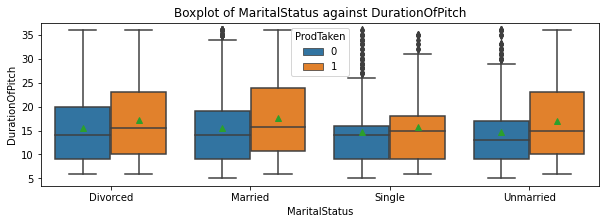

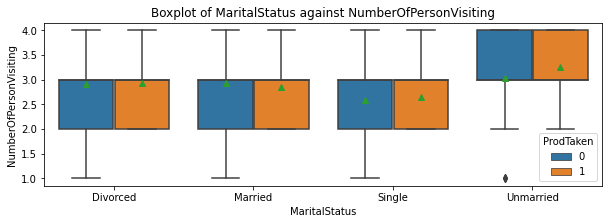

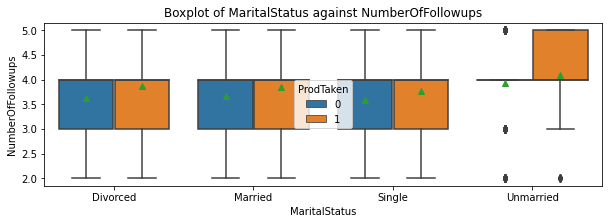

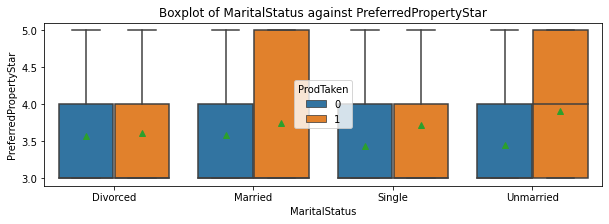

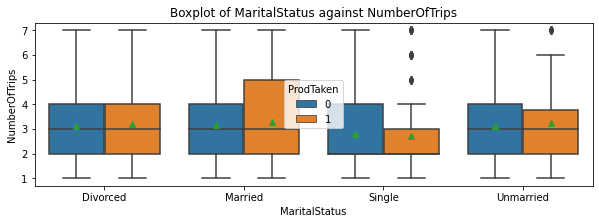

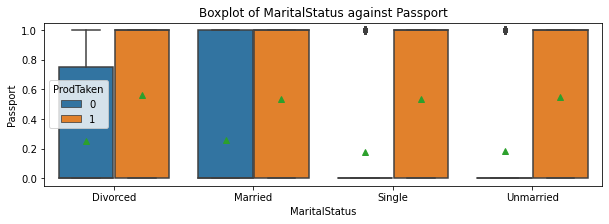

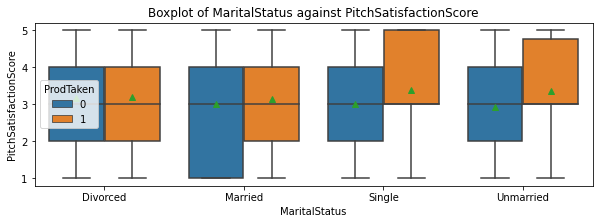

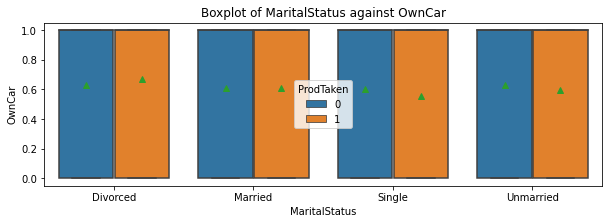

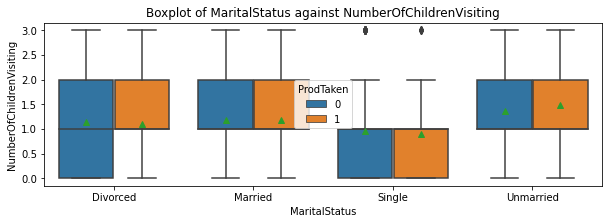

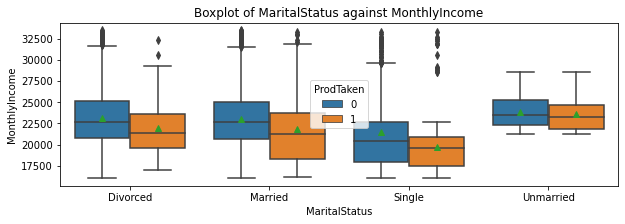

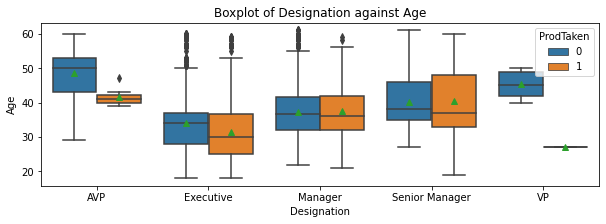

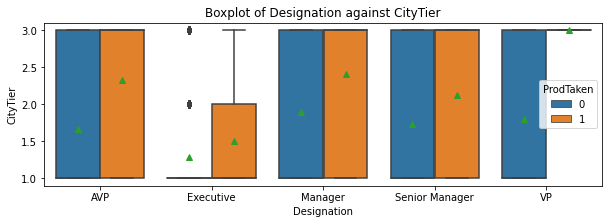

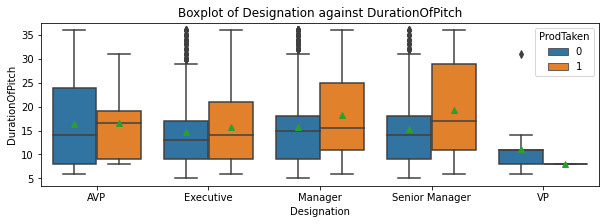

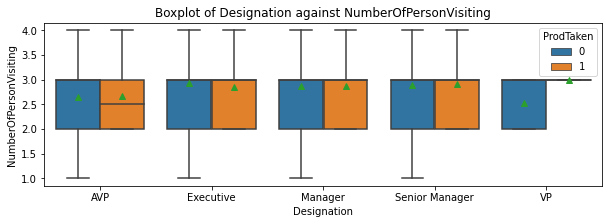

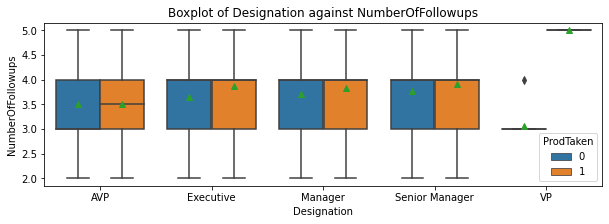

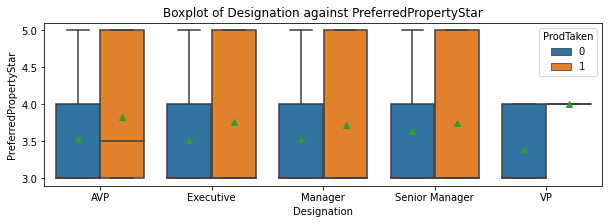

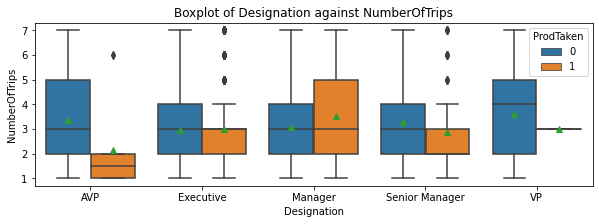

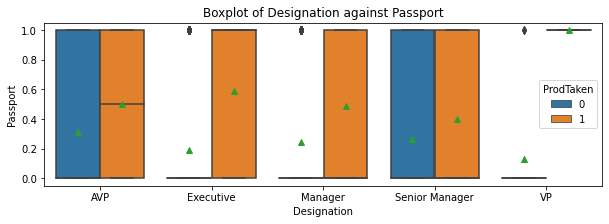

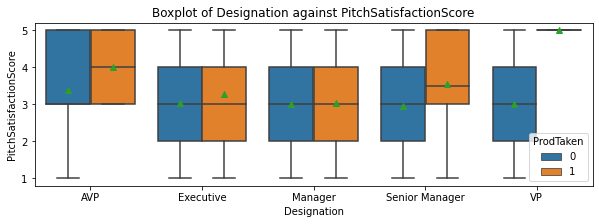

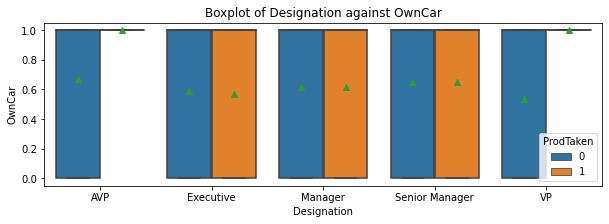

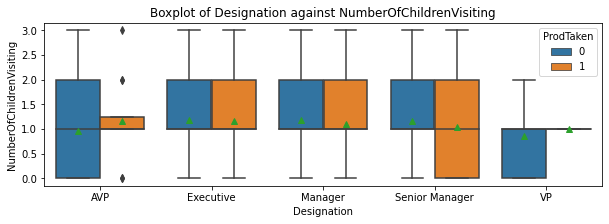

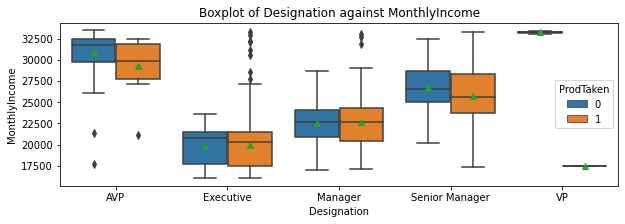

In [27]:
for i in df.columns:
    if type(df[i][0])==str:
        for j in df.columns:
            if type(df[j][0])!=str and j!='ProdTaken':
                plt.figure(figsize=(10, 3))
                sns.boxplot(x = i, y = j, data = df, showmeans = True, hue='ProdTaken')
                plt.title('Boxplot of {} against {}'.format(i,j))
                plt.show()

From the observation above, we can find out that see on the customer profile of those who take the product. Those who took the product:

1. Have lower age.
2. Have longer duration of pitch. 
3. Have passports.
4. Have somewhat higher preferred property star.
5. Have somewhat higher number of followups.
6. Have a higher average of city tier.
7. Have higher pitch satisfaction score.
8. Have less monthly income.

The findings above can be useful for the marketing team to target the audience for further marketing campaigns.

We can also see that:

1. Freelancers are only at city tier 1, while other occupations are well spread throughout the other city tiers.
2. The duration of pitch is generally lower for freelancers as compared to other occupations.
3. There are more number of persons planning to take the trip with freelancers as compared to other occupations.
4. There are more number of followups for freelancers as compared to other occupations.
5. The preferred property star for freelancers is only 3, with other customers with other occupations prefer a property star of between 3 and 4.
6. There are more number of trips per year for freelancers.
7. All freelancers have passports, while more of people with other occupations don't have a passport.
8. No freelancers own a car.
9. There are less number of children with age less than 5 planning to take the trip with freelancers as compared to other occupations.
10. Monthly income is generally lower for freelancers as compared to other occupations.
11. All freelancers took the product.
12. Older customers (40 and above) generally has the product King and Super Deluxe pitched to them, while Basic is pitched for younger customers.
13. Customers with Basic pitched to them are generally of a city tier 1.
14. Customers with Super Deluxe pitched to them have higher pitch satisfaction score.
15. Customers with King and Super Deluxe pitched to them have higher monthly income.
16. Single people tend to take the product more than other people of other marital status.
17. Unmarried people (divorced) have more people visiting them as compared to other people of other marital status.
18. Unmarried people (divorced) have more number of followups as compared to other people of other marital status.
19. There are less number of children with age less than 5 planning to take the trip with single people.
20. Executives have higher chance to take the product as compared to other designations.
21. As expected, people with higher designations are older.
22. Generally, AVPs provide higher pitch satisfaction score as compared to other designations.
23. As expected, people with higher designations have higher monthly income.

#### Characteristics of people from different packages (for those who took the product):

1. **Basic**

    a. Taken by younger people - aged around 25 to 35
    
    b. City tier around 1-2
    
    c. Duration of pitch around 10-20 mins
    
    d. NumberOfPersonVisiting is around 2-3 people
    
    e. Followed up around 3-4 times, with 4 on average
    
    f. Average property star is around 3.8
    
    g. Average number of trips per year is 3
    
    h. Around 60% have passport
    
    i. Pitch satisfaction score average is around 3.3 on average
    
    j. Slightly less than 60% own a car
    
    k. NumberOfChildrenVisiting is 1 on average
    
    l. Have average salary of around 20000
    
    
    
2. **Deluxe**

    a. Taken by people aged around 30 to 40
    
    b. City tier mostly are 2 or 3
    
    c. Average duration of pitch is around 18 mins
    
    d. NumberOfPersonVisiting is 2-3 people
    
    e. Followed up around 3-4 times, with 4 on average
    
    f. Average property star is around 3.8
    
    g. Average number of trips per year is 3.5
    
    h. Around 50% have passport
    
    i. Pitch satisfaction score is around 3 on average
    
    j. Around 60% own a car
    
    k. NumberOfChildrenVisiting is 1 on average
    
    l. Have average salary of around 22500
    
    
    
3. **King**

    a. The product is marketed to those with age above 40, but none took the product. The buyers are young adults slightly below 30 years old.
    
    b. All buyers are of city tier 3.
    
    c. Duration of pitch is slightly below 10 minutes for buyers.
    
    d. All buyers have 3 NumberOfPersonVisiting 
    
    e. All buyers are followed up 5 times. Nonbuyers are not followed up up to 5 times.
    
    f. All buyers have preferred property star of 4
    
    g. All buyers have number of trips per year of 3
    
    h. All buyers have passport.
    
    i. All buyers have pitch satisfaction score of 5.
    
    j. All buyers have a car.
    
    k. All buyers have NumberOfChildrenVisiting of 1.
    
    l. The product is marketed to those with high monthly salary (more than 32500), but buyers have low monthly salary of around 17500.
    
    
    
4. **Standard**

    a. Taken by people of age around 35 to 45 years old
    
    b. City tier of 2 on average
    
    c. Duration of pitch of 20 mins on average
    
    d. NumberOfPersonVisiting is 2-3 people
    
    e. Followed up around 3-4 times, with 4 on average
    
    f. Average property star is around 3.8
    
    g. Average number of trips per year of 3
    
    h. Around 40% have passport
    
    i. Have an average of 3.5 of pitch satisfaction score
    
    j. More than 60% have a car
    
    k. NumberOfChildrenVisiting is 1 on average
    
    l. Have monthly income of around 25000 to 27500
    
    
    
5. **Super Deluxe**

    a. Product is marketed to those with age around 45-55 years old, but buyers are around 40-45 years of age.
    
    b. City tier of 2.25 on average.
    
    c. Average duration of pitch is around 18 mins
    
    d. The average NumberOfPersonVisiting is around 2.75
    
    e. Average number of followups is 3.5
    
    f. Average number of preferred property star is around 3.9
    
    g. The average number of trips per year is 2
    
    h. Around 55% have passport
    
    i. The average pitch satisfaction score is 4
    
    j. All buyers have a car
    
    k. NumberOfChildrenVisiting is 1 on average
    
    l. Have monthly income of around 27500 to 32500


## Model Building

#### Splitting into Train & Test Data

In [28]:
#converting categorical data into dummy

d1 = pd.get_dummies(df['TypeofContact'], drop_first=True)
d2 = pd.get_dummies(df['Occupation'], drop_first=True)
d3 = pd.get_dummies(df['ProductPitched'], drop_first=True)
d4 = pd.get_dummies(df['MaritalStatus'], drop_first=True)
d5 = pd.get_dummies(df['Gender'], drop_first=True)
d6 = pd.get_dummies(df['Designation'], drop_first=True)

df = pd.concat([df,d1,d2,d3,d4,d5,d6], axis = 1)

df.drop('TypeofContact',axis = 1,inplace=True)
df.drop('Occupation',axis = 1,inplace=True)
df.drop('ProductPitched',axis = 1,inplace=True)
df.drop('MaritalStatus',axis = 1,inplace=True)
df.drop('Gender',axis = 1,inplace=True)
df.drop('Designation',axis = 1,inplace=True)

df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Standard,Super Deluxe,Married,Single,Unmarried,Male,Executive,Manager,Senior Manager,VP
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,...,0,0,0,0,0,1,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,1,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,36.771885,1,8.0,2,3.0,4.0,1.0,0,5,...,0,0,0,0,0,1,1,0,0,0


In [29]:
#defining independent and dependent variables
X = df.drop("ProdTaken" , axis=1)
y = df.pop("ProdTaken")

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 1, stratify = y)

In [31]:
#confusion matrix function
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
#function to calculate metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1-score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#### Model Creation - Bagging Classifier

As per discussed, the metric of interest is precision.

In [33]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [34]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9913941480206541
Accuracy on test set :  0.8907630522088353
Recall on training set :  0.956442831215971
Recall on test set :  0.538135593220339
Precision on training set :  0.9981060606060606
Precision on test set :  0.8246753246753247
F1 score on training set :  0.9768303985171455
F1 score on test set :  0.6512820512820513


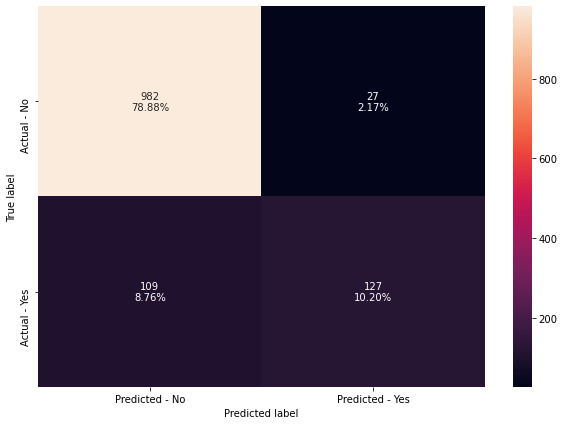

In [35]:
make_confusion_matrix(bagging_estimator,y_test)

As per seen above, train results are much higher than test, indicating overfitting. The precision value seems pretty good.

#### Model Creation - Random Forest Classifier

In [36]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [37]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8875502008032129
Recall on training set :  1.0
Recall on test set :  0.4745762711864407
Precision on training set :  1.0
Precision on test set :  0.875
F1 score on training set :  1.0
F1 score on test set :  0.6153846153846153


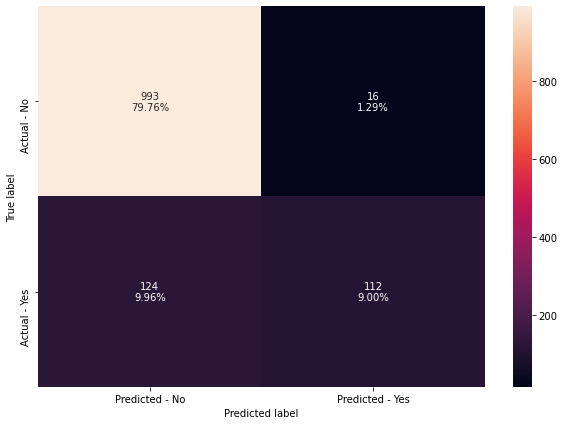

In [38]:
make_confusion_matrix(rf_estimator,y_test)

The precision values are pretty good, but overfitting is still detected. Let's try to improve the two models using hyperparameter tuning as per below.

#### Model Creation - Bagging Classifier with Hyperparameter Tuning

In [39]:
##BASE ESTIMATOR - DECISION TREE

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.4,0.5,0.6,0.7,0.8,0.9], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,60],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=60,
                  random_state=1)

In [40]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.8907630522088353
Recall on training set :  1.0
Recall on test set :  0.4957627118644068
Precision on training set :  1.0
Precision on test set :  0.8731343283582089
F1 score on training set :  1.0
F1 score on test set :  0.6324324324324324


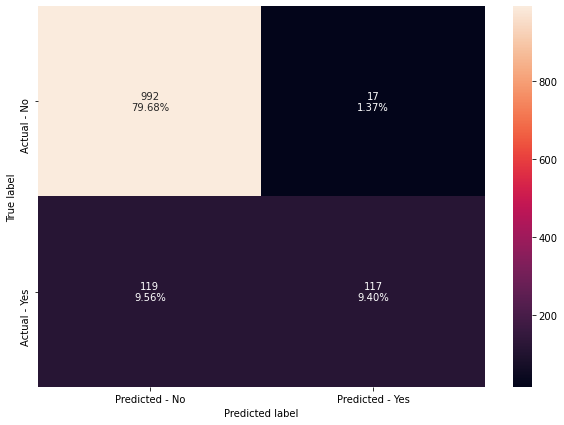

In [41]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

Precision has been improved using the tuned model, but overfitting is still present. Let's try changing the base estimator.

In [42]:
##BASE ESTIMATOR - LOGISTIC REGRESSION WITHOUT HYPERPARAMETER TUNING

bagging_lr = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear', random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [43]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8227194492254734
Accuracy on test set :  0.8184738955823293
Recall on training set :  0.06533575317604355
Recall on test set :  0.0423728813559322
Precision on training set :  1.0
Precision on test set :  1.0
F1 score on training set :  0.12265758091993186
F1 score on test set :  0.0813008130081301


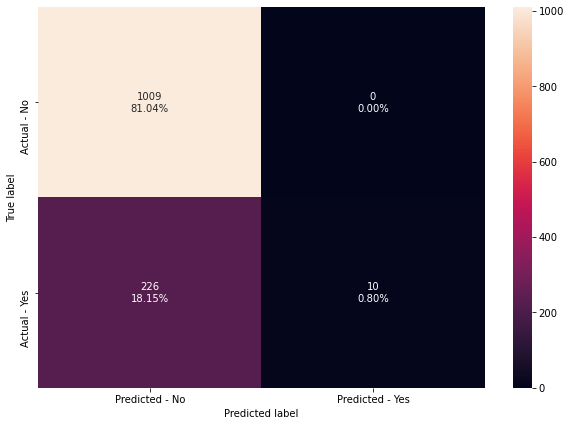

In [44]:
make_confusion_matrix(bagging_lr,y_test)

Using this model, overfitting seems to be rid of. Precision is greatly improved, but F1-score is very low. As compared to the previous model, where the actual & predicted yes is 119, here it is only 10. We'll continue to use the log regression as base estimator using hyperparameter tuning/gridsearch.

In [45]:
##BASE ESTIMATOR - LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING

# Choose the type of classifier. 
bagging_estimator_tunedlog = LogisticRegression(solver='liblinear', random_state=1)


parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [40,50,60,70,80],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)


# Run the grid search
grid_objlog = GridSearchCV(bagging_estimator_tunedlog, parameters, scoring=acc_scorer,cv=5)
grid_objlog = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tunedlog = grid_objlog.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tunedlog.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=60,
                  random_state=1)

In [46]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_estimator_tunedlog)

Accuracy on training set :  1.0
Accuracy on test set :  0.8907630522088353
Recall on training set :  1.0
Recall on test set :  0.4957627118644068
Precision on training set :  1.0
Precision on test set :  0.8731343283582089
F1 score on training set :  1.0
F1 score on test set :  0.6324324324324324


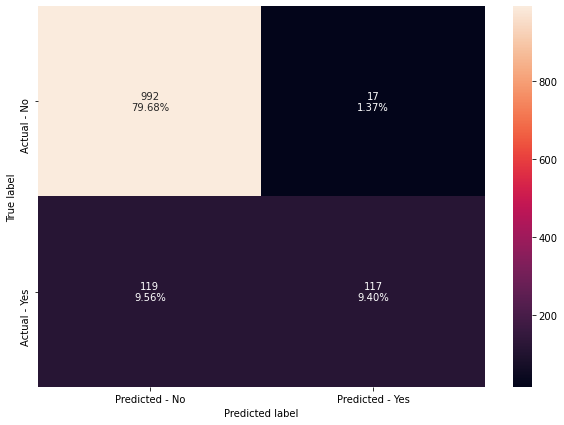

In [47]:
make_confusion_matrix(bagging_estimator_tunedlog,y_test)

From the model above, the value of precision and F1 is good, however overfitting is still observed for all of the metric results (although it seems to be the only problem using this technique). It seemed that it's hard to get rid of overfitting using the technique.

#### Model Creation - Random Forest Classifier with Hyperparameter Tuning

In [78]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [100,150,200],
    "min_samples_leaf": np.arange(2, 6),
    "max_features": np.arange(0.2, 0.5, 0.1),
    "max_samples": np.arange(0.3, 0.6, 0.1),
    "class_weight": [{0: 0.2, 1: 0.8}] #proportion adjusted roughly to how many '0' and '1' in the dependent variable
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                       max_features=0.30000000000000004, max_samples=0.5,
                       min_samples_leaf=2, random_state=1)

In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9693631669535284
Accuracy on test set :  0.8602409638554217
Recall on training set :  0.8820326678765881
Recall on test set :  0.4322033898305085
Precision on training set :  0.9529411764705882
Precision on test set :  0.7183098591549296
F1 score on training set :  0.9161168708765315
F1 score on test set :  0.5396825396825397


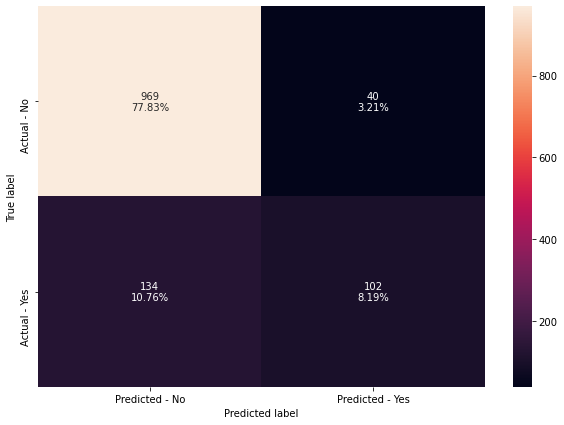

In [80]:
make_confusion_matrix(rf_estimator_tuned,y_test)

The value of precision does not seem to be improving, and tuning the model does not really help to improve overfitting. Based on performance, tuned bagging classifier seems to yield the best results when putting F1 score and precision into account. Further elaboration will be shown closer to conclusion. Let's see on the boosting techniques below.

#### Model Creation - Adaboost Classifier

In [48]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [49]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score = get_metrics_score(abc)

Accuracy on training set :  0.8509466437177281
Accuracy on test set :  0.8329317269076305
Recall on training set :  0.3430127041742287
Recall on test set :  0.2966101694915254
Precision on training set :  0.7269230769230769
Precision on test set :  0.625
F1 score on training set :  0.46609124537607893
F1 score on test set :  0.40229885057471265


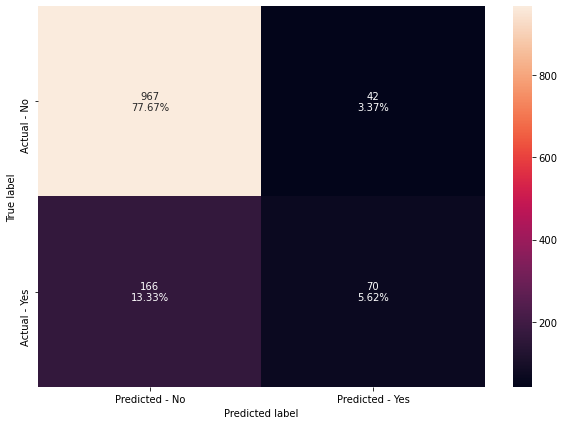

In [50]:
make_confusion_matrix(abc,y_test)

Here we can see that the metric scores are not that great. Let's see on other models below.

#### Model Creation - Gradient Boosting

In [51]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [52]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8929432013769363
Accuracy on test set :  0.8401606425702811
Recall on training set :  0.49727767695099817
Recall on test set :  0.3135593220338983
Precision on training set :  0.8896103896103896
Precision on test set :  0.6666666666666666
F1 score on training set :  0.6379511059371361
F1 score on test set :  0.42651296829971186


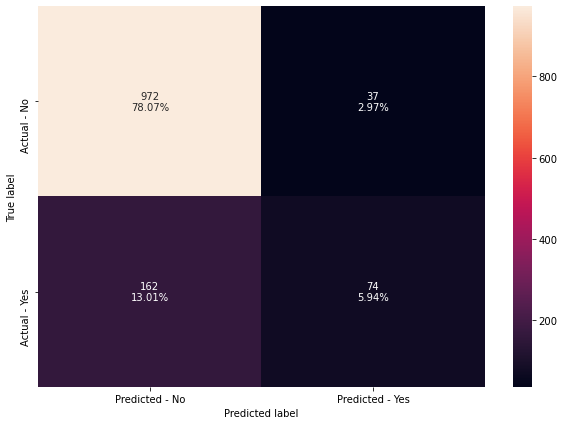

In [53]:
make_confusion_matrix(gbc,y_test)

The metric scores are better than Adaboosting, although not as good as the boosting techniques. Let's continue using XGBoost to see the results.

#### Model Creation - XGBoost Classifier

In [54]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[13:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.8971887550200803
Recall on training set :  1.0
Recall on test set :  0.5847457627118644
Precision on training set :  1.0
Precision on test set :  0.8214285714285714
F1 score on training set :  1.0
F1 score on test set :  0.6831683168316832


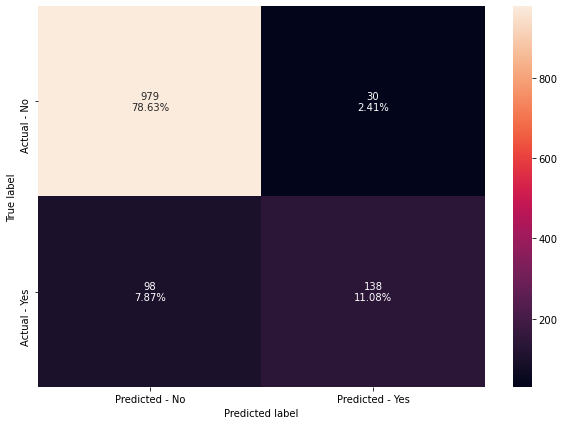

In [56]:
make_confusion_matrix(xgb,y_test)

The results (precision and F1) are much better compared to Adaboost Classifier and Gradient Boosting, however we can see that there is overfitting (train results are higher than test). Let's combine the three boosting techniques with hyperparameter tuning and see if overfitting can be rid of.

#### Model Creation - Adaboost Classifier with Hyperparameter Tuning

In [61]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=30, random_state=1)

In [62]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8199655765920826
Accuracy on test set :  0.8160642570281125
Recall on training set :  0.0544464609800363
Recall on test set :  0.038135593220338986
Precision on training set :  0.9375
Precision on test set :  0.8181818181818182
F1 score on training set :  0.10291595197255575
F1 score on test set :  0.0728744939271255


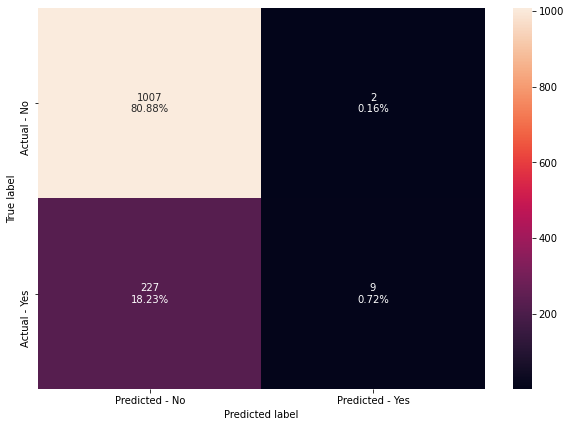

In [63]:
make_confusion_matrix(abc_tuned,y_test)

Precision score is good, but F1 score is very low. Plus, the amount of true positives that are detected are extremely low. Let's continue looking at the other tuned boosting methods.

#### Model Creation - Gradient Boosting with Hyperparameter Tuning

In [75]:
# Choose the type of classifier. 
gbc_tune = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_ob = GridSearchCV(gbc_tune, parameters, scoring=acc_scorer,cv=5)
grid_ob = grid_ob.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tune = grid_ob.best_estimator_

# Fit the best algorithm to the data.
gbc_tune.fit(X_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=1, subsample=1)

In [76]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tune_score=get_metrics_score(gbc_tune)

Accuracy on training set :  0.8530120481927711
Accuracy on test set :  0.8353413654618473
Recall on training set :  0.24682395644283123
Recall on test set :  0.17796610169491525
Precision on training set :  0.918918918918919
Precision on test set :  0.7924528301886793
F1 score on training set :  0.38912732474964234
F1 score on test set :  0.2906574394463668


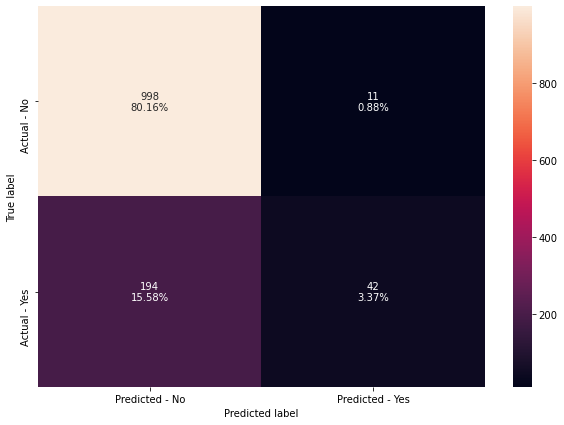

In [77]:
make_confusion_matrix(gbc_tune,y_test)

It seemed that there are still quite a few amount of true positives predicted, although improved.

#### Model Creation - Gradient Boosting with init=AdaBoostClassifier with Hyperparameter Tuning

In [66]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [67]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8509466437177281
Accuracy on test set :  0.8345381526104417
Recall on training set :  0.23411978221415608
Recall on test set :  0.1652542372881356
Precision on training set :  0.9214285714285714
Precision on test set :  0.8125
F1 score on training set :  0.37337192474674386
F1 score on test set :  0.2746478873239437


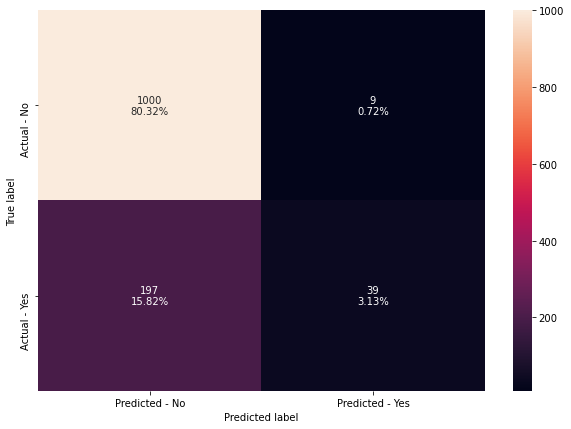

In [68]:
make_confusion_matrix(gbc_tuned,y_test)

The amount of true positives are still low.

#### Model Creation - XGBoost Classifier with Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [70]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8402753872633391
Accuracy on test set :  0.8289156626506025
Recall on training set :  0.16696914700544466
Recall on test set :  0.11016949152542373
Precision on training set :  0.9484536082474226
Precision on test set :  0.896551724137931
F1 score on training set :  0.2839506172839506
F1 score on test set :  0.19622641509433963


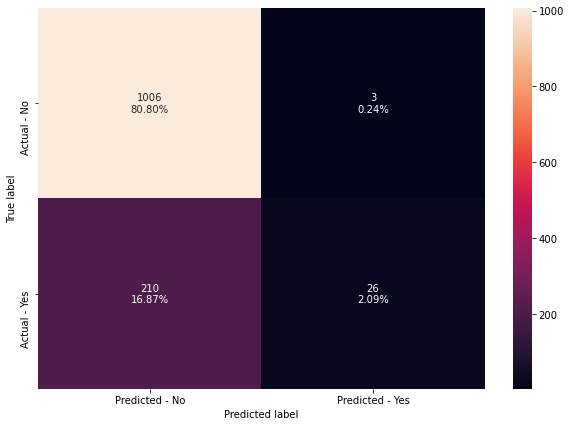

In [71]:
make_confusion_matrix(xgb_tuned,y_test)

The amount of true positives are still low. In addition, it seemed that overfitting cannot be rid of using tuning. It seems that among boosting, XGBoost with default parameters is the wisest choice to be used for prediction.

#### Comparing metrics of all the models

In [84]:
# defining list of models
models = [bagging_estimator, rf_estimator, bagging_estimator_tuned, bagging_lr, bagging_estimator_tunedlog, rf_estimator_tuned,
    abc, abc_tuned, gbc, gbc_tune, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))
    

comparison_frame = pd.DataFrame({'Model':[
    
    'Bagging Classifier with default parameters',
    'Random Forest with default parameters',
    'Tuned Bagging Classifier',
    'Bagging classifier with base_estimator=LR',
    'Tuned Bagging classifier with base_estimator=LR',
    'Tuned Random Forest Classifier',
    'AdaBoost with default parameters',
    'AdaBoost Tuned', 
    'Gradient Boosting with default parameters',
    'Gradient Boosting Tuned',
    'Gradient Boosting with init=AdaBoost Tuned',
    'XGBoost with default parameters',
    'XGBoost Tuned'], 
                                 
    'Train_Accuracy': acc_train,
    'Test_Accuracy': acc_test,
    'Train_Recall': recall_train,
    'Test_Recall': recall_test,
    'Train_Precision': precision_train,
    'Test_Precision': precision_test,
    'Train_F1': f1_train,
    'Test_F1': f1_test,
                                
                                })

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Bagging Classifier with default parameters,0.99,0.89,0.96,0.54,1.00,0.82,0.98,0.65
1,Random Forest with default parameters,1.00,0.89,1.00,0.47,1.00,0.88,1.00,0.62
2,Tuned Bagging Classifier,1.00,0.89,1.00,0.50,1.00,0.87,1.00,0.63
3,Bagging classifier with base_estimator=LR,0.82,0.82,0.07,0.04,1.00,1.00,0.12,0.08
4,Tuned Bagging classifier with base_estimator=LR,1.00,0.89,1.00,0.50,1.00,0.87,1.00,0.63
5,Tuned Random Forest Classifier,0.97,0.86,0.88,0.43,0.95,0.72,0.92,0.54
6,AdaBoost with default parameters,0.85,0.83,0.34,0.30,0.73,0.62,0.47,0.40
7,AdaBoost Tuned,0.82,0.82,0.05,0.04,0.94,0.82,0.10,0.07
8,Gradient Boosting with default parameters,0.89,0.84,0.50,0.31,0.89,0.67,0.64,0.43
9,Gradient Boosting Tuned,0.85,0.84,0.25,0.18,0.92,0.79,0.39,0.29


Based on the metrics of all the models above combined, the model with the best test precision is **bagging classifier with logistic regression as base estimator**, followed by **tuned XGBoost**. However, the F1 score for the two models are very low, shown by a very low number in true positives. Adding the F1 score and number of true positives as consideration, a good model for the prediction would be either **tuned bagging classifier** and **tuned bagging classifier with logistic regression as base estimator** for bagging, and **XGBoost with default parameters** for boosting.

Let's check on the feature importances for XGBoost with default parameters, as we can't see feature importances for bagging model. (AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_')

#### Checking feature importances 

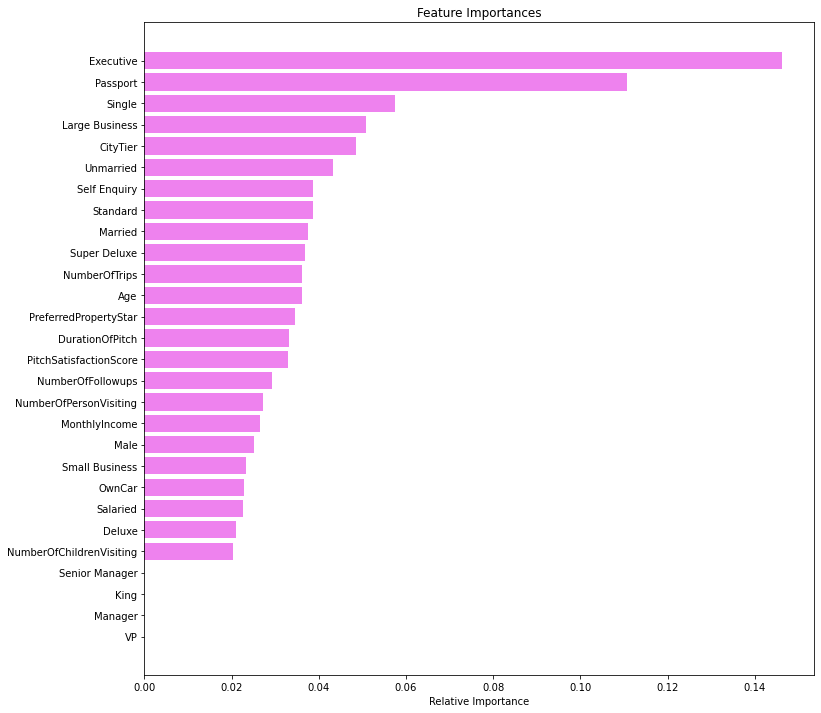

In [86]:
#checking feature importances for XGBoost 
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top three feature importances are:
1. Executive
2. Passport
3. Single

## Actionable Insights & Recommendations

From the findings above, several key actionable insights & recommendations would be : 
1. To stop marketing the product King to those aged above 40, as there is 0% success rate, and it would be a waste on resources
2. To target more people with executive as designation
3. To target more people with passports
4. To target more single people
5. To target more people who works in a/owns a large business
6. To target more people in a higher city rating
7. To focus more on selling the product Basic, Deluxe and Standard as they are much more frequently bought by customers
8. To target younger customers